In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [80]:
# Utility functions

# Calculate gini coeficient 
def gini(w):
    N = w.size
    w = np.sort(w)
    G = 2*np.sum(np.arange(1,N+1)*w)/(N*np.sum(w)) - (1+1/N)
    return G

# Calculate the proportion of people who moved by more than one quintile
def mobility(v,w):
    vbins = np.percentile(v,[0,20,40,60,80,100])
    wbins = np.percentile(w,[0,20,40,60,80,100])
    vinds = np.digitize(v,vbins)
    winds = np.digitize(w,wbins)
    changes = np.absolute(winds-vinds)
    return (np.sum(changes>1))/len(v)

# Advanced kinetic exchange
def kinetic_exchange(v,w):
    R = np.random.random(size=v.size)
    delta = R*np.minimum(v,w)
    v+=delta
    w-=delta
    return (v,w)

# Pairing
def pairs(N):
    arr = np.arange(N)
    np.random.shuffle(arr)
    return (arr[:int(N/2)],arr[int(N/2):])

# wealth exchange once
def kin_exchange_world(world):
    vindex,windex = pairs(1000)
    newv,neww = kinetic_exchange(world[vindex],world[windex])
    world[vindex] = newv
    world[windex] = neww
    return world

# Iteration
def iterate_once(world,incomes,capreturn_econgrowth_ratio):
    total_wealth = np.sum(world)
    total_econgrowth = np.sum(incomes)
    capreturn = total_econgrowth*capreturn_econgrowth_ratio
    growth_factor = capreturn/total_econgrowth
    world *= growth_factor
    world += incomes
    kin_exchange_world(world)
    wealth_normalization(world)
    return world

# Normalise 
def wealth_normalization(world):
    totalwealth = np.sum(world)
    if totalwealth>10000:
        world *= (10000/totalwealth)
    return world


In [94]:
# Initialize data
# Per-timestep income of 1000 individuals 
incomes = np.random.normal(loc=0.5, scale=0.2,size=1000)
incomes[incomes<0]+=0.3
people_wealth = incomes.copy()
np.min(incomes)
# Growth due to income = sum(incomes)

0.0011771183187934131

In [95]:
# Return on capital < Growth due to income

time_period = 500
ratioo = 0.7
world_1 = people_wealth.copy()
ginis_1 = []
for i in range(time_period):
    iterate_once(world_1,incomes,ratioo)
    ginis_1.append(gini(world_1.copy()))

In [96]:
# Return on capital < Growth due to income

time_period = 500
ratioo = 10
world_2 = people_wealth.copy()
ginis_2 = []
for i in range(time_period):
    iterate_once(world_2,incomes,ratioo)
    ginis_2.append(gini(world_2.copy()))

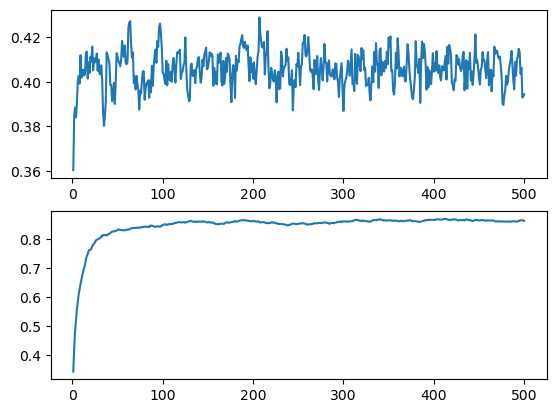

In [98]:
#Graph plot

fig, axes = plt.subplots(2,1)
axes[0].plot(np.arange(1,501),ginis_1)
axes[1].plot(np.arange(1,501),ginis_2)